<a href="https://colab.research.google.com/github/enwachukwu/abc/blob/main/Facebook_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset_train =pd.read_csv('/content/drive/MyDrive/DataSet/facebook_stock_dataset_train.csv')

In [ ]:
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,02/01/2013,27.440001,28.180000,27.420000,28.000000,28.000000,69846400
1,03/01/2013,27.879999,28.469999,27.590000,27.770000,27.770000,63140600
2,04/01/2013,28.010000,28.930000,27.830000,28.760000,28.760000,72715400
3,07/01/2013,28.690001,29.790001,28.650000,29.420000,29.420000,83781800
4,08/01/2013,29.510000,29.600000,28.860001,29.059999,29.059999,45871300
...,...,...,...,...,...,...,...
1757,24/12/2019,206.300003,206.789993,205.000000,205.119995,205.119995,6046300
1758,26/12/2019,205.570007,207.820007,205.309998,207.789993,207.789993,9350700
1759,27/12/2019,208.669998,208.929993,206.589996,208.100006,208.100006,10284200
1760,30/12/2019,207.860001,207.899994,203.899994,204.410004,204.410004,10524300


In [ ]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1762 non-null   object 
 1   Open       1762 non-null   float64
 2   High       1762 non-null   float64
 3   Low        1762 non-null   float64
 4   Close      1762 non-null   float64
 5   Adj Close  1762 non-null   float64
 6   Volume     1762 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 96.5+ KB


In [ ]:
dataset_train.shape

(1762, 7)

In [ ]:
dataset_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
dataset_train.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
dataset_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1762.0,1.170313e+02,5.316405e+01,22.99,7.501000e+01,1.177250e+02,1.682600e+02,2.157200e+02
High,1762.0,1.182482e+02,5.359518e+01,23.09,7.570000e+01,1.186350e+02,1.698675e+02,2.186200e+02
Low,1762.0,1.157598e+02,5.271485e+01,22.67,7.426500e+01,1.167150e+02,1.666425e+02,2.142700e+02
Close,1762.0,1.170577e+02,5.318932e+01,22.90,7.499250e+01,1.176750e+02,1.685475e+02,2.175000e+02
Adj Close,1762.0,1.170577e+02,5.318932e+01,22.90,7.499250e+01,1.176750e+02,1.685475e+02,2.175000e+02
Volume,1762.0,3.154075e+07,2.568547e+07,5913100.00,1.604355e+07,2.308740e+07,3.765158e+07,3.654579e+08


In [ ]:
dataset_train.isna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1757,False,False,False,False,False,False,False
1758,False,False,False,False,False,False,False
1759,False,False,False,False,False,False,False
1760,False,False,False,False,False,False,False


In [ ]:
dataset_train.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
dataset_train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1757    False
1758    False
1759    False
1760    False
1761    False
Length: 1762, dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

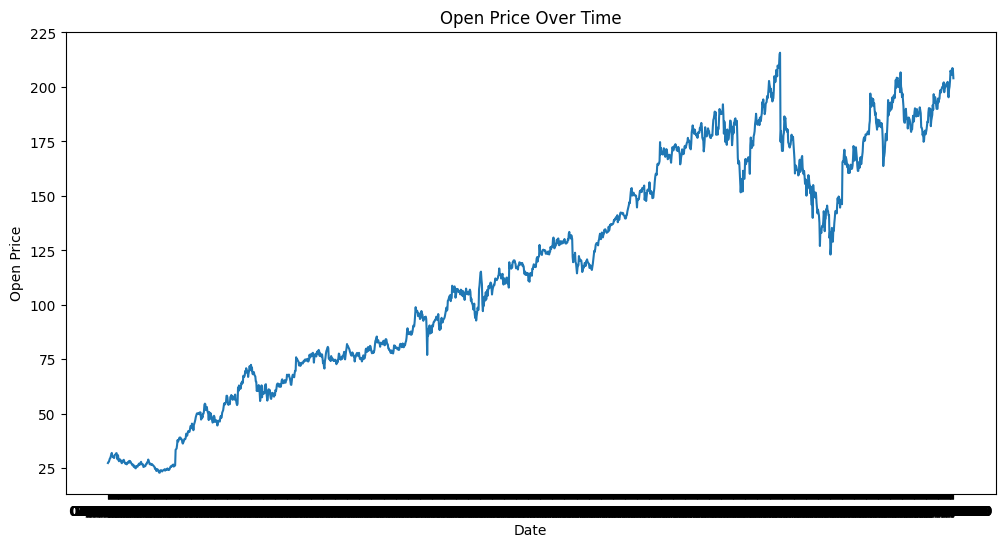

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(dataset_train['Date'], dataset_train['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Price Over Time')
plt.show

In [ ]:
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
training_set

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
x_train = []
y_train = []
for i in range(60,1762):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshaping with reshape function which can be used to add more column
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print(x_train)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regrassor = Sequential()

In [ ]:
# Adding the LSTM layer and some Dropout regulation
regrassor.add(LSTM(units= 100, return_sequences=False, input_shape  =(x_train.shape[1], 1)))
regrassor.add(Dropout(0.1))

In [ ]:
#regrassor.add(LSTM(units= 50, return_sequences=True))
#regrassor.add(Dropout(0.1))

In [ ]:
#regrassor.add(LSTM(units= 50, return_sequences=True))
#regrassor.add(Dropout(0.1))

In [ ]:
#regrassor.add(LSTM(units= 50))
#regrassor.add(Dropout(0.1))

In [ ]:
regrassor.add(Dense(units= 1))

In [ ]:
from keras.src.optimizers import adam
# Compiling the RNN
regrassor.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Fitting the RNN to the training dataset
regrassor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
54/54 [==============================] - 2s 32ms/step - loss: 0.0045
Epoch 2/100
54/54 [==============================] - 2s 29ms/step - loss: 0.0042
Epoch 3/100
54/54 [==============================] - 1s 22ms/step - loss: 0.0043
Epoch 4/100
54/54 [==============================] - 1s 22ms/step - loss: 0.0041
Epoch 5/100
54/54 [==============================] - 1s 22ms/step - loss: 0.0042
Epoch 6/100
54/54 [==============================] - 1s 22ms/step - loss: 0.0043
Epoch 7/100
54/54 [==============================] - 1s 22ms/step - loss: 0.0038
Epoch 8/100
54/54 [==============================] - 1s 22ms/step - loss: 0.0039
Epoch 9/100
54/54 [==============================] - 1s 23ms/step - loss: 0.0038
Epoch 10/100
54/54 [==============================] - 1s 22ms/step - loss: 0.0040
Epoch 11/100
54/54 [==============================] - 2s 32ms/step - loss: 0.0040
Epoch 12/100
54/54 [==============================] - 2s 31ms/step - loss: 0.0038
Epoch 13/100
54/54 [=====

In [ ]:
dataset_test =pd.read_csv('/content/drive/MyDrive/DataSet/facebook_stock_dataset_test.csv')

In [ ]:
dataset_test

In [ ]:
oreginal_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
# Getting the predicted stock price.
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,80):
  x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regrassor.predict(x_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 21ms/step


In [ ]:
predicted_stock_price

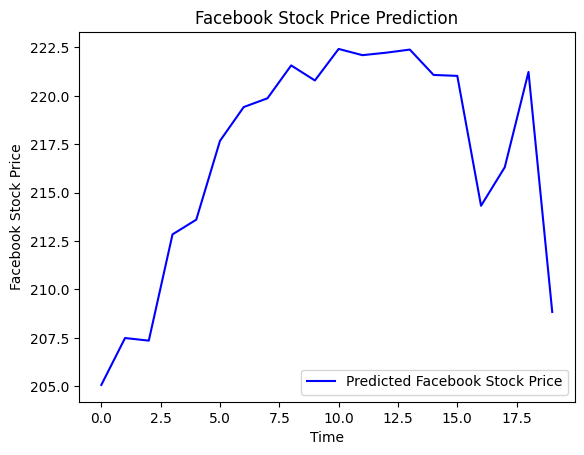

In [ ]:
#Visualizing the fresult

plt.plot(predicted_stock_price ,color = 'blue', label = 'Predicted Facebook Stock Price' )
plt.title('Facebook Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Facebook Stock Price')
plt.legend()
plt.show()

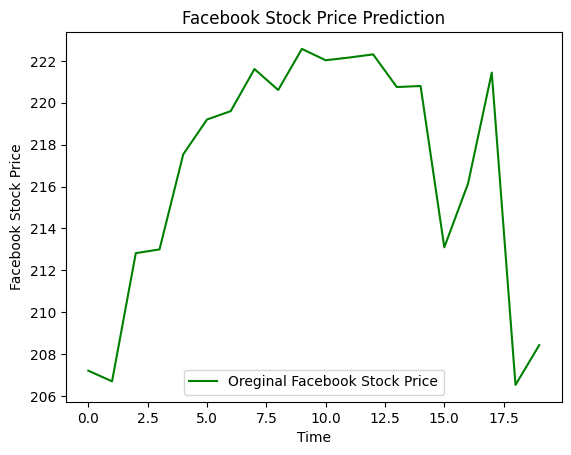

In [ ]:
plt.plot(oreginal_stock_price ,color = 'Green', label = 'Oreginal Facebook Stock Price' )
plt.title('Facebook Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Facebook Stock Price')
plt.legend()
plt.show()